In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [43]:
df.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,74.924952,0.70375,173.447166,99.841525,502.246625,4.977500,709.167849
std,14.496298,0.45666,72.298671,9.888547,99.222767,2.259816,199.497621
min,50.003622,0.00000,50.062655,66.724469,102.007518,0.000000,108.252421
25%,62.380142,0.00000,108.734463,93.101146,435.810131,3.000000,576.382146
50%,74.630855,1.00000,175.596395,99.762840,502.877959,5.000000,722.532738
75%,87.792071,1.00000,235.200606,106.447769,568.249383,6.000000,847.814106
max,99.998898,1.00000,299.992054,138.520202,876.694217,15.000000,1406.110705


In [44]:
# Example feature selection
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']]
y = df['Yield_kg_per_hectare'] # Target variable

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [47]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)), # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

C:\Users\ambar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# MEan squared error and mean absolute error

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, verbose = 1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 539065.3125 - mae: 705.3984 - val_loss: 558421.6250 - val_mae: 720.7037
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 520314.8750 - mae: 693.5836 - val_loss: 506213.4375 - val_mae: 685.0457
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 454115.8750 - mae: 645.3776 - val_loss: 365338.5312 - val_mae: 580.3091
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 296927.3750 - mae: 518.4838 - val_loss: 168204.2656 - val_mae: 390.9030
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121713.2422 - mae: 325.2625 - val_loss: 42211.4336 - val_mae: 186.4222
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29659.3125 - mae: 150.5799 - val_loss: 13559.2188 - val_mae: 95.5616
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12228.7832 - mae: 89.1085 - val_loss: 10506.8076 - val_mae: 81.5687
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10355.8086 - mae: 81.0805 - val_loss: 96

In [51]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2873.2090 - mae: 43.2654 
Test Mean Absolute Error:  41.35


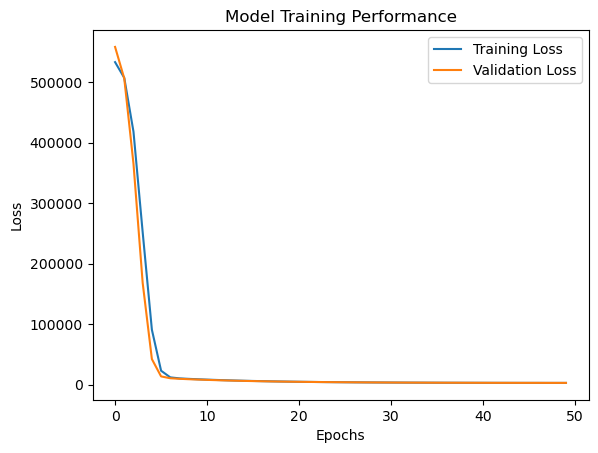

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [53]:
y_predictions = model.predict(X_test)
y_predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 445.43323],
       [ 683.36584],
       [1086.2318 ],
       [ 666.5973 ],
       [ 833.2705 ],
       [1011.295  ],
       [ 303.42313],
       [ 584.97864],
       [ 441.0717 ],
       [ 804.94214],
       [ 614.1289 ],
       [ 673.2688 ],
       [ 627.8075 ],
       [ 733.7344 ],
       [ 850.0461 ],
       [ 682.3812 ],
       [ 974.85284],
       [ 486.22574],
       [ 599.19867],
       [ 368.16135],
       [ 787.4004 ],
       [ 817.5387 ],
       [ 370.76773],
       [ 833.1134 ],
       [1016.3949 ],
       [ 595.3524 ],
       [ 653.9387 ],
       [ 974.662  ],
       [ 616.0276 ],
       [ 619.8124 ],
       [ 688.90265],
       [ 804.779  ],
       [ 831.4321 ],
       [ 813.42346],
       [ 510.9243 ],
       [ 724.98694],
       [ 717.6666 ],
       [1026.3663 ],
       [ 237.66219],
       [ 654.69904],
       [ 943.9546 ],
       [ 911.9584 ],
       [ 768.00134],
       [ 764.19183],
       [ 624.45703],
       [ 844.03784],
       [ 633.2815 ],
       [ 586.

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
# Assuming y_test is your true labels and y_pred is your predicted labels
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 41.92044757317197


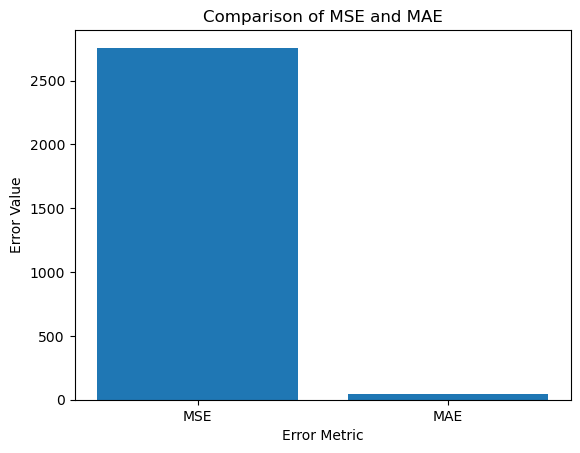

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test is your true labels and y_pred is your predicted labels
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plotting the errors
errors = {'MSE': mse, 'MAE': mae}
plt.bar(errors.keys(), errors.values())
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.title('Comparison of MSE and MAE')
plt.show()

C:\Users\ambar\AppData\Local\Temp\ipykernel_6572\3542362800.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\ambar\AppData\Local\Temp\ipykernel_6572\3542362800.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


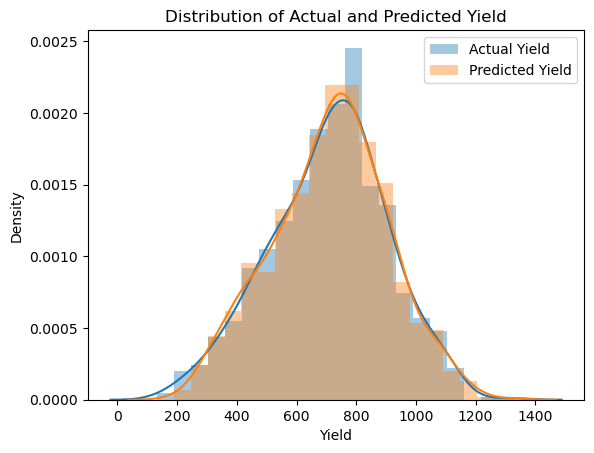

In [57]:
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [58]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumptions')
plt.ylabel('Predicted Energy Consumptions')
plt.title('Predictions vs True Values')
plt.show()

NameError: name 'predictions' is not defined